In [1]:
from tracker.iou import iou
from tracker.concat_trackers import *
from tracker.find_worms import *
import os 

warnings.simplefilter(action='ignore', category=FutureWarning)

- `p2tracker` 为具体到盘子文件夹的路径

In [ ]:
# 写到具体的文件夹名
p2tracker = "./simple_trackers_result/n2_3_7_11.04" 
analysis_folder = os.path.split(p2tracker)[-1]

# Part I load subjects and obtain finer trackers

<Axes: xlabel='frame'>

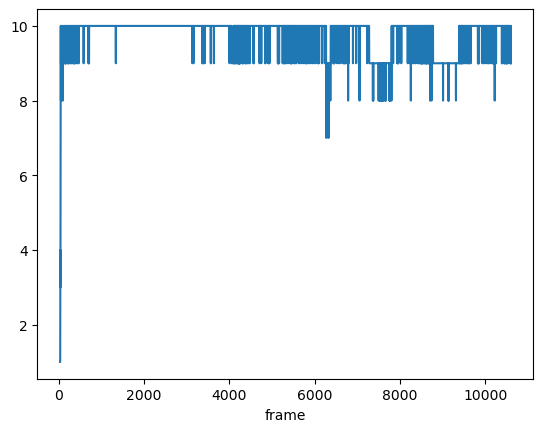

In [5]:
all_trackers, long_dfs, centroid = load_subj('simple_trackers_result', analysis_folder) # load the Petri dish tracker results
new_trackers, new_summarize = trackers2fine(all_trackers, long_dfs)     # convert the trackers to finer trackers
long_dfs.groupby('frame').size().plot() # visualize the number of worms per frame

# PART II Find initial worms
- `find_initial(long_dfs, *, new_summarize)`: **此处的 \* 为盘中虫子数，取决于上面的图像最高点**

In [7]:
all_ini = find_initial(long_dfs, 10, new_summarize)
ini_indx = all_ini.sort_values(by='start_frame').tracker_id.values
print(len(ini_indx))

10


# PART III Find & Diagnosis & Save worms

In [9]:
# find worms based on the initial indices and summarized dataframe
worms = find_worms(ini_indx, new_summarize)
valid_worms = diagnosis_worms_square(worms, new_summarize, centroid, long_dfs, 870)

$[112] all path banned
worm 9 end frame < max frame


In [10]:
# Save results:
## analysis_folder specifies the name of the subfolder where results will be saved
write_results(analysis_folder, valid_worms, new_trackers, centroid, 900, shape='square')

In [ ]:
worms

[array([ 90,  91, 295, 298, 307, 324, 327, 337, 338, 340, 344, 347, 351,
        366, 372, 374, 388, 391, 393, 397, 398, 399, 400, 401, 402, 407,
        410, 412, 415, 420, 423, 424, 427, 431, 434, 436, 441, 444, 446,
        447, 450, 451, 452, 456, 458, 462, 470, 475, 484, 486, 491, 507,
        521]),
 array([ 28,  87,  96, 107, 108, 153, 233, 236, 239, 416, 426, 430, 438,
        445, 455, 461, 469, 477, 479, 482, 485, 490, 494, 496, 497, 498,
        501, 518, 524]),
 array([127, 137, 149, 151, 229, 230, 231, 234, 235, 237, 244, 247, 248,
        249, 251, 252, 254, 256, 257, 258, 259, 265, 266, 267, 270, 272,
        274, 275, 276]),
 array([  8,   9,  11, 111, 119, 129, 155, 172, 180, 181, 184, 284, 292,
        293, 301, 310, 313, 319, 322, 326, 335]),
 array([  2,   4,  10,  12,  30, 103,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  60,  62,  63,  64,  65,  66,
         